# Housing Model - Multiple Factors

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import random
import modules.aguilera_model as am
import modules.spatial_seg as spseg

In [2]:
# Parameters
lambda_ = 0.8  # lambda parameter for updating house values
n, m = 20, 20  # Grid size

# Define affluence values for rich, middle, and poor
affluence_levels = {
    "rich": 1.0,
    "middle": 0.5,
    "poor": 0.1
}

# Probabilities of rich, middle and poor
p = [0.1, 0.3, 0.6]

# Radius of square neighbourhood
r = 2

In [2]:
def random_board(n, m, p, affluence_levels):
    """
    Initialize the grids with random affluence levels and house values.
    """
    affluence_grid = np.random.choice([affluence_levels["rich"], affluence_levels["middle"], affluence_levels["poor"]], size=(n, m), p=p)
    house_grid = np.random.uniform(0,1,(n, m))
    return affluence_grid, house_grid

In [3]:
def calculate_neighborhood_average(house_grid, x, y, r):
    """
    Calculate the average house value in the square neighborhood of radius r around (x, y).
    """
    n, m = house_grid.shape    
    neighborhood_sum = 0
    count = 0
    
    x_min, y_min = max(0,x-r), max(0,y-r)
    x_max, y_max = min(n,x+r), min(m,y+r)
    
    # Iterate over the neighborhood within the radius
    for i in range(x_min, x_max):
        for j in range(y_min, y_max):
            # Add the neighbor's value to the sum
            neighborhood_sum += house_grid[i, j]
            count += 1

    # Calculate the average value of the neighborhood
    neighborhood_average = neighborhood_sum / count
    return neighborhood_average

In [4]:
def update_values(affluence_grid, house_grid, lambda_, r):
    """
    Update house values based on the affluence and neighborhood average.
    """
    new_house_grid = np.zeros_like(house_grid)
    n, m = house_grid.shape
    for x in range(n):
        for y in range(m):
            affluence = affluence_grid[x, y]
            neighborhood_avg = calculate_neighborhood_average(house_grid, x, y, r)
            new_house_grid[x, y] = affluence + lambda_ * neighborhood_avg
    return new_house_grid

In [20]:
def make_swap(affluence_grid: np.ndarray, house_grid: np.ndarray, guarantee_swap: bool):
    """
    Keep picking two agents until delta > 0, and the swap them.
    """
    n, m = house_grid.shape
    delta = -1
    swap_attempt = 0
    if guarantee_swap:
        n_tries = 1000 # to avoid an infinite loop
    else:
        # We only propose one swap
        n_tries = 1

    # keep trying to swap until you actually get a delta > 0, or until you've tried n_tries times
    while delta <= 0 & swap_attempt < n_tries:
        swap_attempt += 1
        x1, y1, x2, y2 = am.choose_two_houses_rand(house_grid)   
        
        delta = am.calculate_delta_econ(affluence_grid, house_grid, x1, y1, x2, y2)
        
        if delta > 0:
            # Swap the two agents
            affluence_grid[x1, y1], affluence_grid[x2, y2] = affluence_grid[x2, y2], affluence_grid[x1, y1]
        
    return

In [7]:
# Simulation parameters
n_steps = 100
affluence_grid, house_grid = random_board(n, m, p, affluence_levels)

fig, ax = plt.subplots()
fig.suptitle('Step 0')
img = plt.imshow(house_grid, cmap='viridis',vmin=0, vmax=3)

cbar = fig.colorbar(img, ax=ax)
cbar.set_label('House Price')


# Simulation loop
for step in range(n_steps):
    # Update house values
    house_grid = update_values(affluence_grid, house_grid, lambda_, r)
    
    # Propose random move - several in each step
    for i in range(10):
        propose_swap(affluence_grid, house_grid)

    img.set_array(house_grid)
    fig.suptitle(f"Step {step}")
    plt.pause(0.1)
    clear_output(wait=True)
    display(fig)

NameError: name 'n' is not defined

# Reproducing Aguilera 2007

In [6]:
import spatial_seg as spseg
import aguilera_model as am
import importlib

In [50]:
importlib.reload(am)

<module 'aguilera_model' from 'c:\\Users\\marka\\OneDrive\\Documents\\Uni\\Edinburgh Uni\\S1\\Industrial Maths\\Housing_Multiple_IM\\aguilera_model.py'>

In [18]:
# We're going to collect 10 data points
n_simulations = 10
etas = np.linspace(0.501, 0.95, n_simulations)

# Parameters
#lambda_ = 0.9  # lambda parameter for updating house values
lambdas = np.linspace(0.7, 0.95, n_simulations)
n, m = 64,64  # Grid size
r = 2 # Radius of square neighbourhood
n_steps = 50000 # number of simulation iterations
n_swaps_per_step = 1

# Define affluence values for rich, middle, and poor
affluence_levels = {
    "rich": 1.0,
    "middle": 0.5,
    "poor": 0.1
}

i=0, eta=np.float64(0.501)


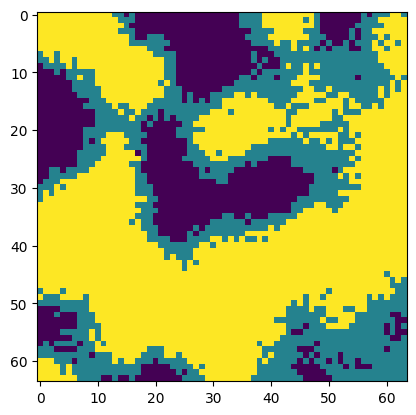

i=1, eta=np.float64(0.5508888888888889)


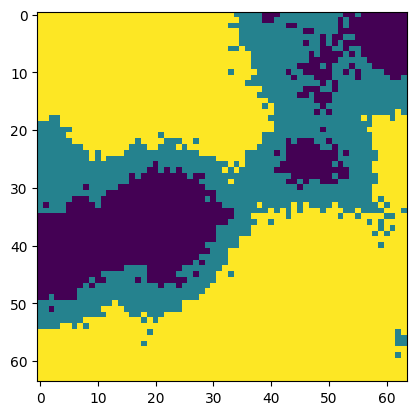

i=2, eta=np.float64(0.6007777777777777)


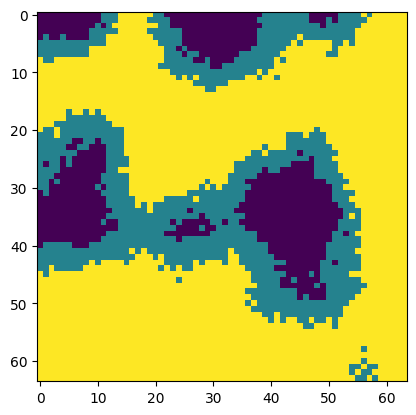

i=3, eta=np.float64(0.6506666666666667)


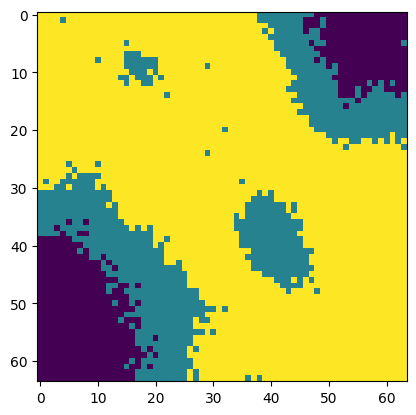

i=4, eta=np.float64(0.7005555555555556)


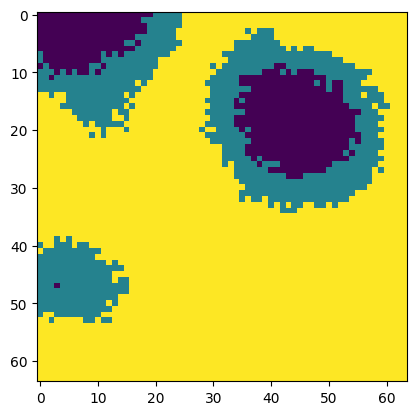

i=5, eta=np.float64(0.7504444444444445)


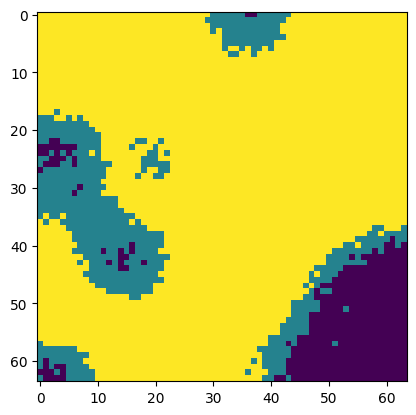

i=6, eta=np.float64(0.8003333333333333)


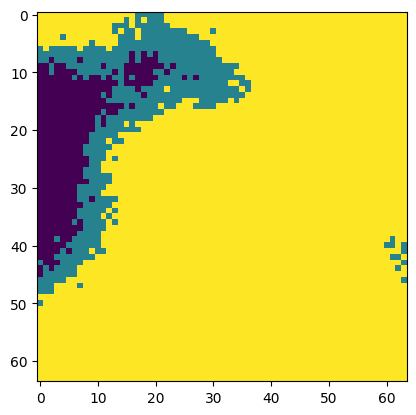

i=7, eta=np.float64(0.8502222222222222)


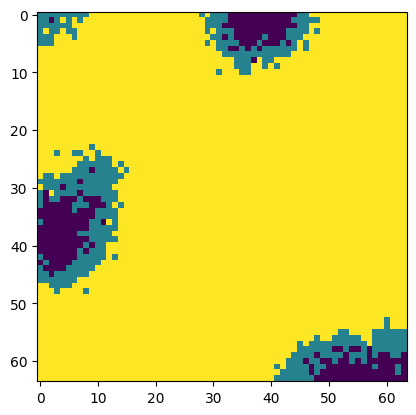

i=8, eta=np.float64(0.9001111111111111)


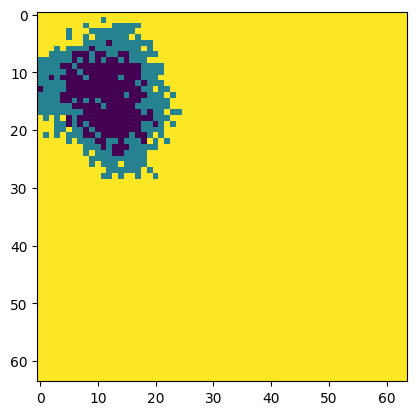

i=9, eta=np.float64(0.95)


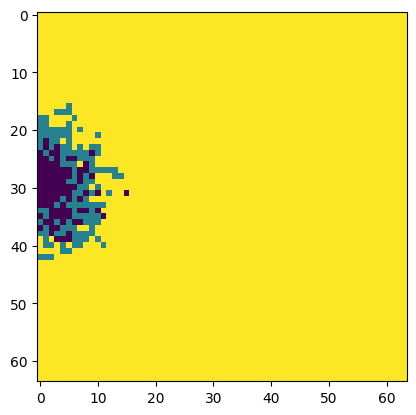

In [21]:
theil_indices = np.zeros(n_simulations)
segregation_indices = np.zeros(n_simulations)

for i, eta in enumerate(etas):
    print(f"{i=}, {eta=}") # for debugging
    p, theil_indices[i] = spseg.generate_unequal_props(eta)
    affluence_grid, house_grid = random_board(n, m, p, affluence_levels)

    # Simulation loop
    for step in range(n_steps):
        # Update house values
        house_grid = am.calculate_new_house_values_conv(house_grid, affluence_grid, r, lambdas[i])
        
        # Propose random move - several in each step
        for j in range(n_swaps_per_step):
            make_swap(affluence_grid, house_grid, guarantee_swap = False)

    plt.imshow(affluence_grid)
    plt.show()
    
    segregation_indices[i] = spseg.spatial_segregation(affluence_grid)

In [16]:
aguilera_theil_indices = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
aguilera_seg_indices = [0.6, 0.5, 0.6, 1.2, 1.55, 2.0, 2.28, 2.52,2.6]

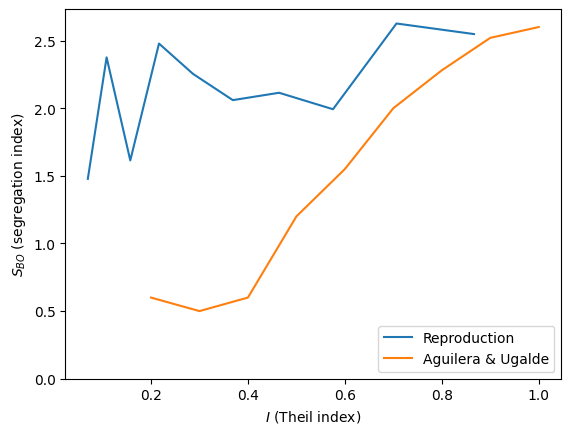

In [30]:
plt.plot(theil_indices, segregation_indices, label = "Reproduction")
plt.plot(aguilera_theil_indices, aguilera_seg_indices, label = "Aguilera & Ugalde")
plt.xlabel(r"$I$ (Theil index)")
plt.ylabel(r"$S_{BO}$ (segregation index)")
plt.legend(loc = 4)
plt.ylim(bottom = 0)
plt.show()

# London simulation

In [39]:
affluence_levels = {
    "rich": 1.0,
    "middle": 0.5,
    "poor": 0.1
}
p = (0.16, 0.6, 0.24)
london_grid = np.loadtxt("london_map_array.txt")
lambda_ = 0.65 # lower bc we have a relatively low theil index
r = 2 # Radius of square neighbourhood
n_steps = 4000 # number of simulation iterations
n_swaps_per_step = 30 # there are 3033 'houses' in the london_grid, so this is about 1%

In [40]:
affluence_grid, house_grid = am.initialise_affluence_and_house_grids(london_grid, affluence_levels, p)

# Simulation loop
for step in range(n_steps):
    # Update house values
    house_grid = am.calculate_new_house_values_conv(house_grid, affluence_grid, r, lambda_, calc_num_neighbours=True)
    
    # Propose random move - several in each step
    for j in range(n_swaps_per_step):
        make_swap(affluence_grid, house_grid, guarantee_swap = True)

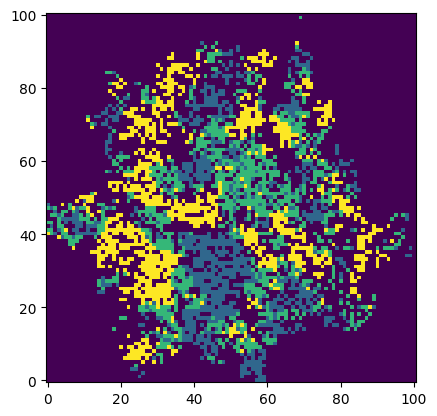

In [43]:
# Put house prices into bins (top 1/3, middle, bottom 1/3)
hp_array = house_grid[house_grid > -1]
percentile_33 = np.percentile(hp_array, 33.3)
percentile_67 = np.percentile(hp_array, 66.7)

hp_matrix_binned = np.ones_like(house_grid)
m,n = hp_matrix_binned.shape
for i in range(m):
    for j in range(n):
        price = house_grid[i,j]
        if price != -1:
            if price <= percentile_33:
                hp_matrix_binned[i,j] = 2
            elif price <= percentile_67:
                hp_matrix_binned[i,j] = 3
            else:
                hp_matrix_binned[i,j] = 4


plt.imshow(hp_matrix_binned, origin = 'lower')
#plt.colorbar()
plt.show()

In [44]:
with open("london_exp_entropy.txt") as f:
    expected_entropy = float(f.read())

# Calc London segregation index
london_sp_seg = spseg.spatial_segregation(hp_matrix_binned, expected_entropy)
london_sp_seg

np.float64(0.09705763418637892)